In doing the coherence analysis in the previous notebook, we found a high coherence that coincided with about 7.5 Hz. In this notebook, the goal is to analyze the coherence at this frequency in more detail. This is note much of a priority now, but it could be interesting to investigate.

In [1]:
import scipy.signal as ss
import h5py
from IPython.display import HTML, display
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from scipy.fft import ifft
from sklearn.utils.extmath import randomized_svd
import time

In [2]:
def loadBradyHShdf5(file, normalize="yes"):
    """

    Parameters
    ----------
    file : str
        path to brady hotspring h5py data file
    normalize : str, optional
        "yes" or "no". Indicates whether or not to remove laser drift and
        normalize. The default is 'yes'.

    Returns
    -------
    data : np array
        channel by samples numpy array of data
    timestamp_arr : numpy array
        array of the timestamps corresponding to the various samples in the
        data. Timestamps for brady hotspring data are with respect to the
        beginning time of the survey.

    """
    with h5py.File(file, "r") as open_file:
        dataset = open_file["das"]
        time = open_file["t"]
        data = np.array(dataset)
        timestamp_arr = np.array(time)
    data = np.transpose(data)
    if normalize == "yes":
        nSamples = np.shape(data)[1]
        # get rid of laser drift
        med = np.median(data, axis=0)
        for i in range(nSamples):
            data[:, i] = data[:, i] - med[i]

        max_of_rows = abs(data[:, :]).sum(axis=1)
        data = data / max_of_rows[:, np.newaxis]
    return data, timestamp_arr


def frequency_filter(data, frequency_range, mode, order, sampling_frequency):
    """
    Butterworth filter of data.

    Parameters
    ----------
    data : array
        1d or 2d array.
    frequency_range : int/sequence
        int if mode is lowpass or high pass. Sequence of 2 frequencies if mode
        is bandpass
    mode : str
        lowpass, highpass or bandpass.
    order : int
        Order of the filter.
    sampling_frequency : int
        sampling frequency.

    Returns
    -------
    filtered_data : array
        Frequency filtered data.

    """
    from scipy.signal import butter, sosfiltfilt

    sos = butter(
        order, frequency_range, btype=mode, output="sos", fs=sampling_frequency
    )
    filtered_data = sosfiltfilt(sos, data)

    return filtered_data

In [3]:
file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083818.h5"
data, _ = loadBradyHShdf5(file, normalize="no")

# file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083848.h5"
# data2,_ = loadBradyHShdf5(file,normalize='no')

# file = r"D:\CSM\Mines_Research\Test_data\Brady Hotspring\PoroTomo_iDAS16043_160314083918.h5"
# data3,_= loadBradyHShdf5(file,normalize='no')

# signalToUse=np.append(data[:,24976:],data2[:,:10000],axis=1)
# data = np.append(data,data2,axis=1)
# data = np.append(data,data3[:,:10000],axis=1)
data = data[2000:6000]
samples_per_sec = 1000

Filter data to a range around 7.5 Hz

In [4]:
filtered_data = frequency_filter(data, [6, 9], "bandpass", 5, 1000)

Plot filtered data

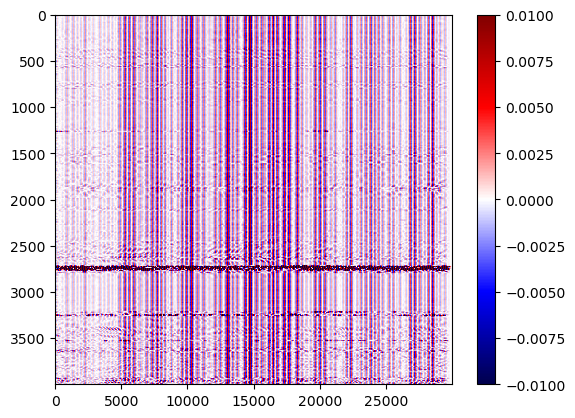

In [6]:
plt.imshow(filtered_data, aspect="auto", cmap="seismic", vmin=-0.01, vmax=0.01)
plt.colorbar()